<a href="https://colab.research.google.com/github/VishnuBhaarath/Gas_turbine_predictive_modelling/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [104]:
import pandas as pd
import numpy as np
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from keras.models import Sequential
import tensorflow as tf
from keras.layers import concatenate
from sklearn.metrics import r2_score
from pandas import DataFrame
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from tensorflow.python.keras.layers import Dense, LSTM,SimpleRNN
from pandas import concat
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense

In [83]:
df=pd.read_csv('/content/drive/MyDrive/gas_turbine/gt_2011-2015.csv')
df.head()

,Unnamed: 0,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [84]:
df=df.drop('Unnamed: 0',axis=1)

GTEP

In [85]:
dataset=df[['AT','AP','AH','TEY','AFDP','GTEP']]
dataset.head()

,AT,AP,AH,TEY,AFDP,GTEP
0,4.5878,1018.7,83.675,134.67,3.5758,23.979
1,4.2932,1018.3,84.235,134.67,3.5709,23.951
2,3.9045,1018.4,84.858,135.10,3.5828,23.990
3,3.7436,1018.3,85.434,135.03,3.5808,23.911
4,3.7516,1017.8,85.182,134.67,3.5781,23.917


In [86]:
train=dataset[0:21947]
test=dataset[21947:36733]

In [87]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train)
scaled_test=scaler.transform(test)

In [88]:
reframed_train=DataFrame(scaled_train)
reframed_test=DataFrame(scaled_test)

In [89]:
reframed_train_values=reframed_train.values
reframed_test_values=reframed_test.values

In [90]:
train_X, train_y = reframed_train_values[:, :-1], reframed_train_values[:, -1]
test_X, test_y = reframed_test_values[:, :-1], reframed_test_values[:, -1]

In [91]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [92]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(21947, 1, 5) (21947,) (14786, 1, 5) (14786,)


Epoch 1/50
305/305 - 4s - loss: 0.1314 - val_loss: 0.1233
Epoch 2/50
305/305 - 1s - loss: 0.0350 - val_loss: 0.0697
Epoch 3/50
305/305 - 1s - loss: 0.0305 - val_loss: 0.0590
Epoch 4/50
305/305 - 1s - loss: 0.0289 - val_loss: 0.0570
Epoch 5/50
305/305 - 1s - loss: 0.0278 - val_loss: 0.0556
Epoch 6/50
305/305 - 1s - loss: 0.0262 - val_loss: 0.0548
Epoch 7/50
305/305 - 1s - loss: 0.0249 - val_loss: 0.0544
Epoch 8/50
305/305 - 1s - loss: 0.0237 - val_loss: 0.0550
Epoch 9/50
305/305 - 1s - loss: 0.0226 - val_loss: 0.0566
Epoch 10/50
305/305 - 1s - loss: 0.0219 - val_loss: 0.0587
Epoch 11/50
305/305 - 1s - loss: 0.0211 - val_loss: 0.0594
Epoch 12/50
305/305 - 1s - loss: 0.0203 - val_loss: 0.0600
Epoch 13/50
305/305 - 1s - loss: 0.0198 - val_loss: 0.0612
Epoch 14/50
305/305 - 1s - loss: 0.0195 - val_loss: 0.0615
Epoch 15/50
305/305 - 1s - loss: 0.0191 - val_loss: 0.0618
Epoch 16/50
305/305 - 1s - loss: 0.0186 - val_loss: 0.0613
Epoch 17/50
305/305 - 1s - loss: 0.0182 - val_loss: 0.0612
Epoch 

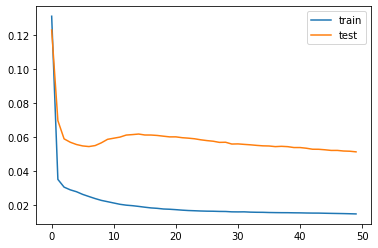

In [93]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [94]:
y_pred=model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
arr1 = np.append(test_X, y_pred, axis=1)
inv_arr1 = scaler.inverse_transform(arr1)
iny_pred=inv_arr1[:,[5]]
test_y=test_y.reshape(test_y.shape[0],1)
arr2=np.append(test_X,test_y,axis=1)
inv_arr2=scaler.inverse_transform(arr2)
iny_test=inv_arr2[:,[5]]
print(r2_score(iny_test,iny_pred))

0.8986800375051129


TIT

In [95]:
dataset=df[['AT','AP','AH','TEY','AFDP','TIT']]
dataset.head()

,AT,AP,AH,TEY,AFDP,TIT
0,4.5878,1018.7,83.675,134.67,3.5758,1086.2
1,4.2932,1018.3,84.235,134.67,3.5709,1086.1
2,3.9045,1018.4,84.858,135.10,3.5828,1086.5
3,3.7436,1018.3,85.434,135.03,3.5808,1086.5
4,3.7516,1017.8,85.182,134.67,3.5781,1085.9


Epoch 1/50
305/305 - 4s - loss: 0.1546 - val_loss: 0.1237
Epoch 2/50
305/305 - 1s - loss: 0.0579 - val_loss: 0.1250
Epoch 3/50
305/305 - 1s - loss: 0.0543 - val_loss: 0.1115
Epoch 4/50
305/305 - 1s - loss: 0.0511 - val_loss: 0.0872
Epoch 5/50
305/305 - 1s - loss: 0.0478 - val_loss: 0.0722
Epoch 6/50
305/305 - 1s - loss: 0.0445 - val_loss: 0.0656
Epoch 7/50
305/305 - 1s - loss: 0.0412 - val_loss: 0.0620
Epoch 8/50
305/305 - 1s - loss: 0.0377 - val_loss: 0.0586
Epoch 9/50
305/305 - 1s - loss: 0.0331 - val_loss: 0.0510
Epoch 10/50
305/305 - 1s - loss: 0.0276 - val_loss: 0.0381
Epoch 11/50
305/305 - 1s - loss: 0.0250 - val_loss: 0.0453
Epoch 12/50
305/305 - 1s - loss: 0.0237 - val_loss: 0.0523
Epoch 13/50
305/305 - 1s - loss: 0.0229 - val_loss: 0.0512
Epoch 14/50
305/305 - 1s - loss: 0.0222 - val_loss: 0.0510
Epoch 15/50
305/305 - 1s - loss: 0.0217 - val_loss: 0.0516
Epoch 16/50
305/305 - 1s - loss: 0.0211 - val_loss: 0.0525
Epoch 17/50
305/305 - 1s - loss: 0.0204 - val_loss: 0.0531
Epoch 

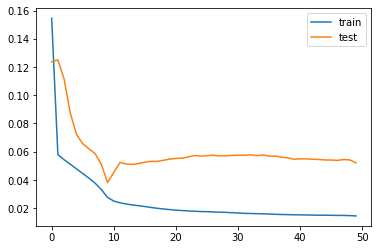

In [96]:
train=dataset[0:21947]
test=dataset[21947:36733]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train)
scaled_test=scaler.transform(test)

reframed_train=DataFrame(scaled_train)
reframed_test=DataFrame(scaled_test)

reframed_train_values=reframed_train.values
reframed_test_values=reframed_test.values

train_X, train_y = reframed_train_values[:, :-1], reframed_train_values[:, -1]
test_X, test_y = reframed_test_values[:, :-1], reframed_test_values[:, -1]


train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [97]:
y_pred=model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
arr1 = np.append(test_X, y_pred, axis=1)
inv_arr1 = scaler.inverse_transform(arr1)
iny_pred=inv_arr1[:,[5]]
test_y=test_y.reshape(test_y.shape[0],1)
arr2=np.append(test_X,test_y,axis=1)
inv_arr2=scaler.inverse_transform(arr2)
iny_test=inv_arr2[:,[5]]
print(r2_score(iny_test,iny_pred))

0.8810737227985878


TAT

In [105]:
dataset=df[['AT','AP','AH','TEY','AFDP','TAT']]
dataset.head()

,AT,AP,AH,TEY,AFDP,TAT
0,4.5878,1018.7,83.675,134.67,3.5758,549.83
1,4.2932,1018.3,84.235,134.67,3.5709,550.05
2,3.9045,1018.4,84.858,135.10,3.5828,550.19
3,3.7436,1018.3,85.434,135.03,3.5808,550.17
4,3.7516,1017.8,85.182,134.67,3.5781,550.00


Epoch 1/200
305/305 - 3s - loss: 0.1417 - val_loss: 0.1168
Epoch 2/200
305/305 - 1s - loss: 0.1216 - val_loss: 0.1246
Epoch 3/200
305/305 - 1s - loss: 0.1193 - val_loss: 0.1481
Epoch 4/200
305/305 - 2s - loss: 0.1214 - val_loss: 0.1890
Epoch 5/200
305/305 - 1s - loss: 0.1229 - val_loss: 0.1972
Epoch 6/200
305/305 - 1s - loss: 0.1262 - val_loss: 0.1706
Epoch 7/200
305/305 - 1s - loss: 0.1250 - val_loss: 0.1541
Epoch 8/200
305/305 - 1s - loss: 0.1240 - val_loss: 0.1431
Epoch 9/200
305/305 - 1s - loss: 0.1237 - val_loss: 0.1278
Epoch 10/200
305/305 - 2s - loss: 0.1230 - val_loss: 0.1137
Epoch 11/200
305/305 - 1s - loss: 0.1228 - val_loss: 0.1080
Epoch 12/200
305/305 - 1s - loss: 0.1222 - val_loss: 0.1075
Epoch 13/200
305/305 - 1s - loss: 0.1216 - val_loss: 0.1074
Epoch 14/200
305/305 - 1s - loss: 0.1210 - val_loss: 0.1072
Epoch 15/200
305/305 - 1s - loss: 0.1204 - val_loss: 0.1079
Epoch 16/200
305/305 - 1s - loss: 0.1198 - val_loss: 0.1062
Epoch 17/200
305/305 - 2s - loss: 0.1192 - val_lo

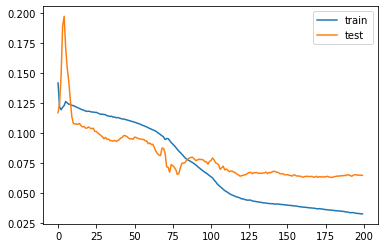

In [111]:
train=dataset[0:21947]
test=dataset[21947:36733]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train)
scaled_test=scaler.transform(test)

reframed_train=DataFrame(scaled_train)
reframed_test=DataFrame(scaled_test)

reframed_train_values=reframed_train.values
reframed_test_values=reframed_test.values

train_X, train_y = reframed_train_values[:, :-1], reframed_train_values[:, -1]
test_X, test_y = reframed_test_values[:, :-1], reframed_test_values[:, -1]


train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

model = Sequential()
model.add(SimpleRNN(300, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=200, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [110]:
y_pred=model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
arr1 = np.append(test_X, y_pred, axis=1)
inv_arr1 = scaler.inverse_transform(arr1)
iny_pred=inv_arr1[:,[5]]
test_y=test_y.reshape(test_y.shape[0],1)
arr2=np.append(test_X,test_y,axis=1)
inv_arr2=scaler.inverse_transform(arr2)
iny_test=inv_arr2[:,[5]]
print(r2_score(iny_test,iny_pred))

0.5249997077317328


TIT


In [101]:
dataset=df[['AT','AP','AH','TEY','AFDP','CDP']]
dataset.head()

,AT,AP,AH,TEY,AFDP,CDP
0,4.5878,1018.7,83.675,134.67,3.5758,11.898
1,4.2932,1018.3,84.235,134.67,3.5709,11.892
2,3.9045,1018.4,84.858,135.10,3.5828,12.042
3,3.7436,1018.3,85.434,135.03,3.5808,11.990
4,3.7516,1017.8,85.182,134.67,3.5781,11.910


Epoch 1/50
305/305 - 4s - loss: 0.1419 - val_loss: 0.1100
Epoch 2/50
305/305 - 1s - loss: 0.0272 - val_loss: 0.0637
Epoch 3/50
305/305 - 1s - loss: 0.0230 - val_loss: 0.0617
Epoch 4/50
305/305 - 1s - loss: 0.0211 - val_loss: 0.0569
Epoch 5/50
305/305 - 1s - loss: 0.0195 - val_loss: 0.0538
Epoch 6/50
305/305 - 1s - loss: 0.0179 - val_loss: 0.0481
Epoch 7/50
305/305 - 1s - loss: 0.0165 - val_loss: 0.0398
Epoch 8/50
305/305 - 1s - loss: 0.0157 - val_loss: 0.0320
Epoch 9/50
305/305 - 1s - loss: 0.0151 - val_loss: 0.0260
Epoch 10/50
305/305 - 1s - loss: 0.0148 - val_loss: 0.0210
Epoch 11/50
305/305 - 1s - loss: 0.0145 - val_loss: 0.0177
Epoch 12/50
305/305 - 1s - loss: 0.0142 - val_loss: 0.0143
Epoch 13/50
305/305 - 1s - loss: 0.0139 - val_loss: 0.0132
Epoch 14/50
305/305 - 1s - loss: 0.0136 - val_loss: 0.0132
Epoch 15/50
305/305 - 1s - loss: 0.0134 - val_loss: 0.0140
Epoch 16/50
305/305 - 1s - loss: 0.0133 - val_loss: 0.0150
Epoch 17/50
305/305 - 1s - loss: 0.0132 - val_loss: 0.0155
Epoch 

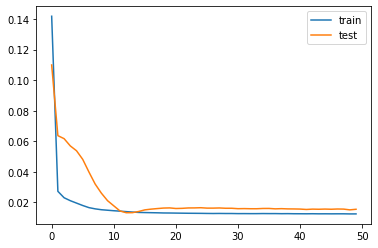

In [102]:
train=dataset[0:21947]
test=dataset[21947:36733]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train)
scaled_test=scaler.transform(test)

reframed_train=DataFrame(scaled_train)
reframed_test=DataFrame(scaled_test)

reframed_train_values=reframed_train.values
reframed_test_values=reframed_test.values

train_X, train_y = reframed_train_values[:, :-1], reframed_train_values[:, -1]
test_X, test_y = reframed_test_values[:, :-1], reframed_test_values[:, -1]


train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [103]:
y_pred=model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
arr1 = np.append(test_X, y_pred, axis=1)
inv_arr1 = scaler.inverse_transform(arr1)
iny_pred=inv_arr1[:,[5]]
test_y=test_y.reshape(test_y.shape[0],1)
arr2=np.append(test_X,test_y,axis=1)
inv_arr2=scaler.inverse_transform(arr2)
iny_test=inv_arr2[:,[5]]
print(r2_score(iny_test,iny_pred))

0.9909510227631736
